<a href="https://colab.research.google.com/github/dhruvmalik007/100-days-of-code/blob/master/Progress_of_opensource_giants.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mapping the history of the opensource "davids": the trendency of squeezing performance from less compute resource.


In this compute notebook, I will be presenting progress of how the opensource AI firms are able to beat the benchmark performance of the perceieved leader of the transformer models (OpenAI). this notebook will give you:

-  The methods to do "Exploratory data analysis" of the various companies opensource contribution data by checking the huggingface hub (in the corresponding future sessions i will also delve into the )

- Then we will explore the power of using semantic operating programming operators using [lotus-ai](https://lotus-ai.readthedocs.io/en/latest/index.html) , which allows the merging of the various dataset using the description of the specification in natural language semantics (similar to the dsPy).



In [ ]:
## installing the relevant packages for the purposes of fetching relevant data and viz.
!pip install transformers datasets trl pygwalker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.4/293.4 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 956.2/956.2 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.7/213.7 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1

In [ ]:
from huggingface_hub import HfApi
from huggingface_hub import ModelInfo, GitCommitInfo
import json
from typing import List
import pygwalker as pyg
import pandas as pd
import json

api = HfApi()

def convert_to_dict(obj):
    """Recursively converts an object and its attributes to a dictionary."""
    if isinstance(obj, (str, int, float, bool, type(None))):
        return obj
    if isinstance(obj, list):
        return [convert_to_dict(item) for item in obj]
    if isinstance(obj, dict):
        return {key: convert_to_dict(value) for key, value in obj.items()}
    if hasattr(obj, 'to_dict'): # Check if object has to_dict method
        return convert_to_dict(obj.to_dict())
    if hasattr(obj, '__dict__'): # If not, try __dict__
        return {key: convert_to_dict(value) for key, value in obj.__dict__.items() if not key.startswith('_')}
    return str(obj)  # Fallback to string representation


class HFModelInfo():
  def __init__(self, org_name):
    self.org_name = org_name

  ## gets the  array of all the model names from the given organisation huggingface page
  def get_all_org_models(self):
    try:
      models = api.list_models(author=self.org_name)
      model_names = [model.modelId for model in models]
      return model_names
    except Exception as e:
      print(f"An error occurred: {e}")
      return [] # Return an empty list in case of an error

  ## fetches the metadata information corresponding to the given model name in the organisation
  def get_model_metadata_information(self,model_name):
    try:
      model_info = api.model_info(model_name)
      return model_info
    except Exception as e:
      print(f"An error occurred: {e}")
      return None # Return None in case of an error

  ## fetches the model metadata for all the model_names mentioned in the given package
  def fetch_model_metadata(self,model_names: list[str]):
    ## first fetches the model metadata corresponding
    model_details = dict()
    for model_name in model_names:
      model_info = self.get_model_metadata_information(model_name)
      # Convert the entire ModelInfo object recursively to a dictionary
      model_details[model_name] = convert_to_dict(model_info)

    ## store the result in the csv file as {org_name}.csv
    with open(f"{self.org_name}.json", "w") as f:
      json.dump(model_details, f, indent=4) # Added indent for better readability
    return model_details

  ## fetches the repository history from the given
  def fetch_model_repo_history(self,model_name):
    try:
      repo_history = api.list_repo_commits(model_name)
      ## get all the commits from
      return repo_history
    except Exception as e:
      print(f"An error occurred: {e}")
      return None # Return None in case of an error
  def fetch_repo_history_metadata(self,model_names: list[str]):
    ## first fetches the model metadata corresponding
    repo_history = dict()
    for model_name in model_names:
      repo_info = self.fetch_model_repo_history(model_name)
      repo_history[model_name] = convert_to_dict(repo_info)
    ## store the result in the csv file as {org_name}.csv
    with open(f"{self.org_name}-commit_history.json", "w") as f:
      json.dump(repo_history, f, indent=4) # Added indent for better readability
    return repo_history

  ## function to fetch the relative information for each model and creates the dataframe
  def create_dataframe_from_nested_json(data):
      """
      Creates a pandas DataFrame from nested JSON data where columns are key-value pairs.
      Args:
          data (dict): The loaded JSON data.

      Returns:
          pandas.DataFrame: The created DataFrame.
      """

      all_models_data = []
      for model_name, model_info in data.items():
          model_data = model_info.copy()  # Start with a copy of model_info
          model_data['id'] = model_name  # Add the model name as 'id'
          all_models_data.append(model_data)

      df = pd.DataFrame(all_models_data)
      return df



class PyPlotVisualizationAnalysis():

  def __init__(self,orgs_names):
    self.org_name = orgs_names
    self.storage_file_path_base = "/content"

  def load_df(self,org_name):
    df = pd.read_csv(f"{self.storage_file_path_base}/{self.org_name}.csv")
    return df

  def create_download_charts(comparison_orgs: list[str]):
    """
    creates the charts of the given enterprises to check their progress.
    """
    ##for org_name in




In [ ]:
model_orgs_comparison = ["deepseek-ai", "m-a-p", "Qwen", "meta-llama", "openai", "mistralai" ]
import pprint

## runs the loop in order to generate the model history along with the repo commit history
for model_org in model_orgs_comparison:
  model_obj = HFModelInfo(org_name=model_org)
  model_names = model_obj.get_all_org_models()
  model_details = model_obj.fetch_model_metadata(model_names)
  repo_history_metadata = model_obj.fetch_repo_history_metadata(model_names)
  ## pretty print these details
  pprint.pprint(model_details)
  pprint.pprint(repo_history_metadata)

Streaming output truncated to the last 5000 lines.
                                            'HfMsl/mistralai-Mixtral-8x7B-v0.1',
                                            'sadsadasdasd/mistralai-Mixtral-8x7B-v0.1',
                                            'MouseHub96/mistralai-Mixtral-8x7B-v0.1',
                                            'naim08/mistralai-Mixtral-8x7B-v0.1',
                                            'jeeve/mistralai-Mixtral-8x7B-v0.1',
                                            'johann22/mixtral-micro',
                                            'benaiboi/mistralai-Mixtral-8x7B-v0.1',
                                            'eric8888879/mistralai-Mixtral-8x7B-v0.1',
                                            'vstechno/mistralai-Mixtral-8x7B-v0.1',
                                            'FlipTip/Mixtral-Chat',
                                            'bberameric/mistralai-Mixtral-8x7B-v0.1',
                                            'Simon-P

## Now for the vizualization:

There are 2 prominent libraries that we can use for the purposes of vizualization.

In order to get more vibrant visualisation: pygwalker ( & its  python framework [kanaries](https://kanaries.net/)) is the most ideal library that allows you to create custom vizualization


else using the custom matplotlib is the free alternative.

In [ ]:
## for pygwalker: create your account (use academic email in order to get free access)
##and then login with the token auth
!pygwalker login

Please visit https://kanaries.net/home/cli?redirect_url=http%3A//localhost%3A48179 to log in.
Waiting for authorization...
Authorization timeout.


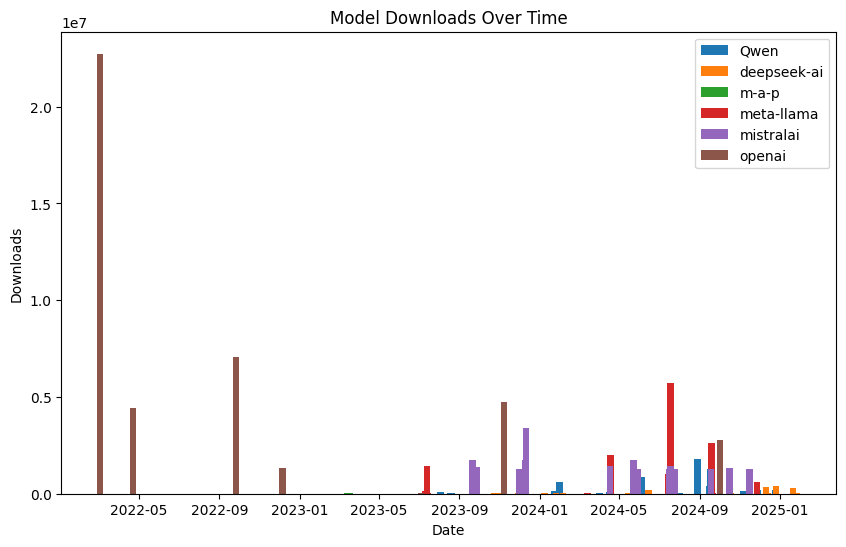

In [ ]:
import pandas as pd
import json
import matplotlib.pyplot as plt

## function to fetch the relative information for each model and creates the dataframe
def create_dataframe_from_nested_json(data):
    """
    Creates a pandas DataFrame from nested JSON data where columns are key-value pairs.
    Args:
        data (dict): The loaded JSON data.

    Returns:
        pandas.DataFrame: The created DataFrame.
    """

    all_models_data = []
    for model_name, model_info in data.items():
        model_data = model_info.copy()  # Start with a copy of model_info
        model_data['id'] = model_name  # Add the model name as 'id'
        all_models_data.append(model_data)

    df = pd.DataFrame(all_models_data)
    return df


model_org_json = dict()

#similar to that load all of the files from the /content/{model_orgs_comparison[i]}.json
for model_org in model_orgs_comparison:
  with open(f"/content/{model_org}.json") as f:
    model_org_json[model_org] = json.load(f)

## convert all of the given informations into their corresponding dataframes
org_df = dict()
for model_org in model_orgs_comparison:
  org_df[model_org] = create_dataframe_from_nested_json(model_org_json[model_org])

## for the determination of the download dataset over time
org_plot_downloads = dict()
for model_org in model_orgs_comparison:
  org_plot_downloads[model_org] = org_df[model_org][['id', 'downloads', 'created_at', 'last_modified']]
  ## concatenate all of the dfs

concatenated_df = pd.concat([org_plot_downloads[model_org] for model_org in model_orgs_comparison], keys=model_orgs_comparison)
# define x and y to be the downloads and created_at
concatenated_df['created_at'] = pd.to_datetime(concatenated_df['created_at'])
concatenated_df['last_modified'] = pd.to_datetime(concatenated_df['last_modified'])


# Plot Downloads Over Time
plt.figure(figsize=(10, 6))
for key, grp in concatenated_df.groupby(level=0):
    plt.bar(grp['created_at'], grp['downloads'], label=key, width=10)
plt.xlabel('Date')
plt.ylabel('Downloads')
plt.title('Model Downloads Over Time')
plt.legend()
plt.show()



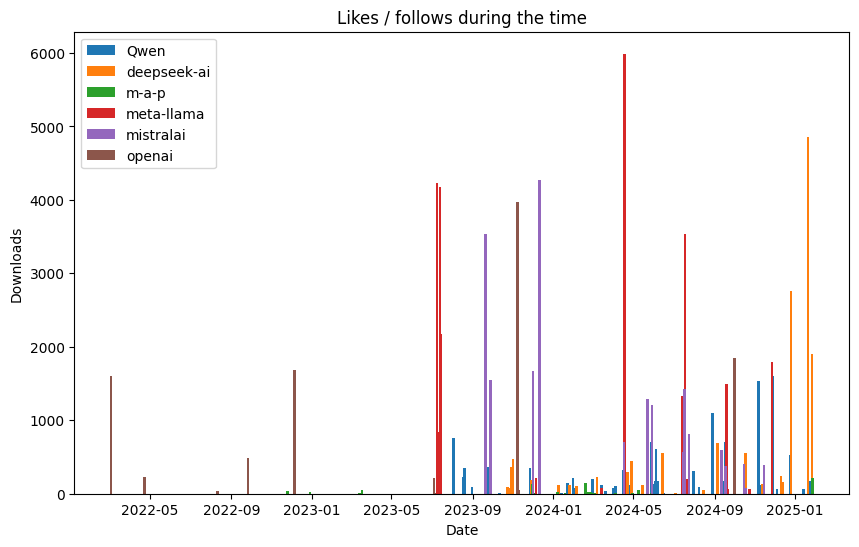

In [ ]:
## graph for the likes throughout the time
org_plot_likes = dict()
for model_org in model_orgs_comparison:
  org_plot_likes[model_org] = org_df[model_org][['id', 'likes', 'created_at', 'last_modified']]
## concatenate all of the dfs
concatenated_df_likes = pd.concat([org_plot_likes[model_org] for model_org in model_orgs_comparison], keys=model_orgs_comparison)
## convert into the datetime
concatenated_df_likes['created_at'] = pd.to_datetime(concatenated_df_likes['created_at'])
concatenated_df_likes['last_modified'] = pd.to_datetime(concatenated_df_likes['last_modified'])
## do the plot
plt.figure(figsize=(10, 6))
for key, grp in concatenated_df_likes.groupby(level=0):
    plt.bar(grp['created_at'], grp['likes'], label=key, width=4)
plt.xlabel('Date')
plt.ylabel('Downloads')
plt.title('Likes / follows during the time')
plt.legend()
plt.show()

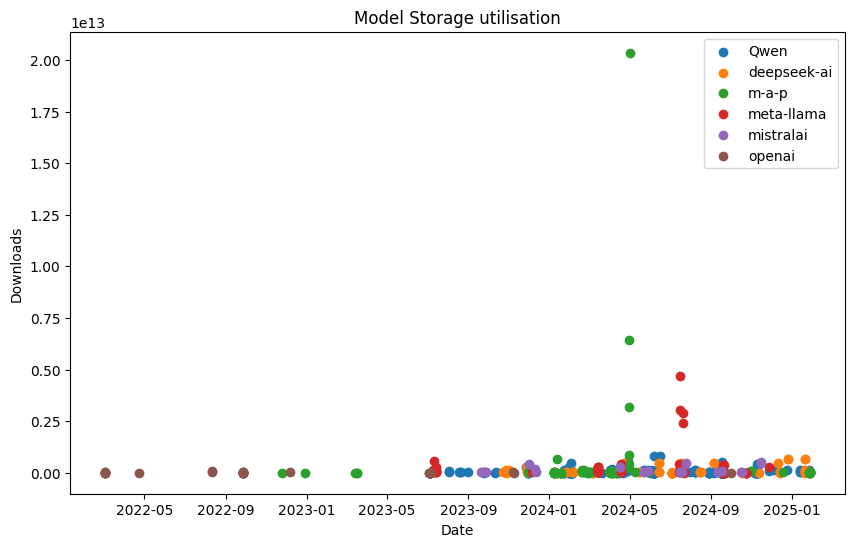

In [21]:
## getting storage usage of the models
org_plot_storage = dict()
for model_org in model_orgs_comparison:
  org_plot_storage[model_org] = org_df[model_org][['id', 'usedStorage', 'created_at', 'last_modified']]
## concatenate all of the dfs
concatenated_df_storage = pd.concat([org_plot_storage[model_org] for model_org in model_orgs_comparison], keys=model_orgs_comparison)

## convert into the datetime
concatenated_df_storage['created_at'] = pd.to_datetime(concatenated_df_storage['created_at'])
concatenated_df_storage['last_modified'] = pd.to_datetime(concatenated_df_storage['last_modified'])

## plot the chart
plt.figure(figsize=(10, 6))
for key, grp in concatenated_df_storage.groupby(level=0):
    plt.scatter(grp['created_at'], grp['usedStorage'], label=key)
plt.xlabel('Date')
plt.ylabel('Downloads')
plt.title('Model Storage utilisation')
plt.legend()
plt.show()

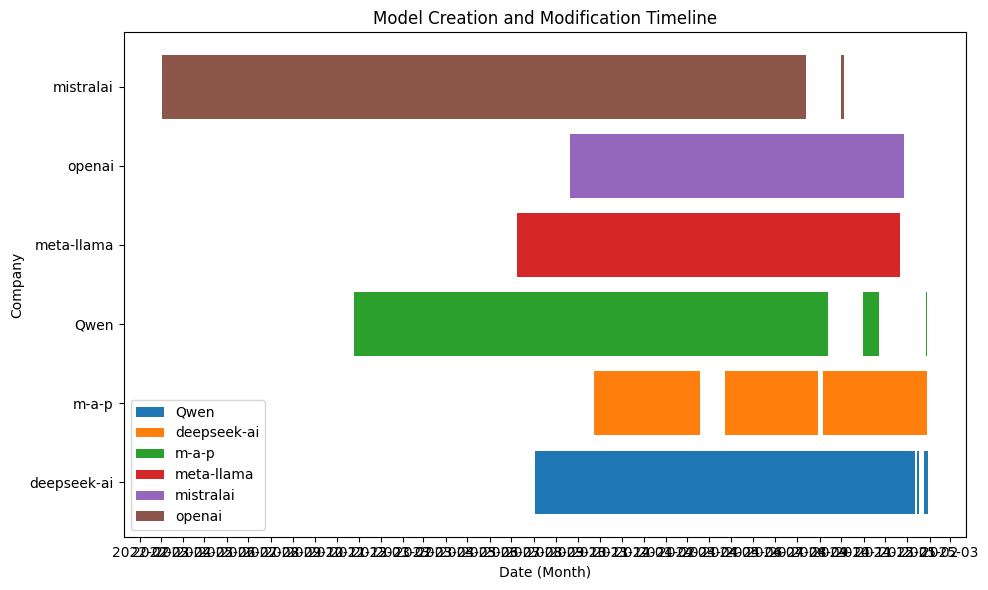

In [ ]:
## now showcasing the bar charts in order to showcase the model creation and modification timeline :

import pandas as pd
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as mcolors


org_create_modification = dict()
for model_org in model_orgs_comparison:
  with open(f"/content/{model_org}.json") as f:
    org_create_modification[model_org] = json.load(f)

## convert all of the given informations into their corresponding dataframes
org_df_create_modification = dict()
for model_org in model_orgs_comparison:
  org_df_create_modification[model_org] = create_dataframe_from_nested_json(org_create_modification[model_org])


## concatenating the various dataframes
org_gant_chart_contatenated = pd.concat([org_df_create_modification[model_org][['id', 'created_at', 'last_modified']] for model_org in model_orgs_comparison], keys=model_orgs_comparison).reset_index(level=0).rename(columns={'level_0': 'key'})
## convert into the details into the datetime

org_gant_chart_contatenated['created_at'] = pd.to_datetime(org_gant_chart_contatenated['created_at'])
org_gant_chart_contatenated['last_modified'] = pd.to_datetime(org_gant_chart_contatenated['last_modified'])

# Prepare data for Gantt chart
org_gant_chart_contatenated['duration'] = org_gant_chart_contatenated['last_modified'] - org_gant_chart_contatenated['created_at']

# Define a color map for different companies
colors = list(mcolors.TABLEAU_COLORS.values())  # Use a predefined color map

# Plot Gantt chart
fig, ax = plt.subplots(figsize=(10, 6))

for i, (key, grp) in enumerate(org_gant_chart_contatenated.groupby('key')):
    ax.broken_barh(
        grp[['created_at', 'duration']].values,
        (i - 0.4, 0.8),
        label=key,
        facecolors=[colors[i % len(colors)]]  # Assign colors cyclically
    )

ax.set_yticks(range(len(org_gant_chart_contatenated['key'].unique())))
ax.set_yticklabels(org_gant_chart_contatenated['key'].unique())

# Format x-axis to display months
ax.xaxis.set_major_locator(mdates.MonthLocator())  # Major ticks on each month
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format as Year-Month

plt.xlabel('Date (Month)')
plt.ylabel('Company')
plt.title('Model Creation and Modification Timeline')
plt.legend()
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()


## now getting more sophisticated data analysis using the lotus_ai


for that you will have to install the package

In [ ]:
!pip install lotus-ai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.5/27.5 MB 37.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 47.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 33.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 6.1 MB/s eta 0:00:00
  Attempting uninstall: httpx
    Found existing installation: httpx 0.28.1
    Uninstalling httpx-0.28.1:
      Successfully uninstalled httpx-0.28.1


In [ ]:
import lotus
import pandas as pd
from lotus.models import LM, SentenceTransformersRM

# Configure models for LOTUS
lm = LM(model="gpt-4o-mini")
rm = SentenceTransformersRM(model="intfloat/e5-base-v2")
lotus.settings.configure(lm=lm, rm=rm)

modules.json:   0%|          | 0.00/387 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/67.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/650 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/200 [00:00<?, ?B/s]